# Emotions Detection in Text

In [74]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [75]:
# Load Dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv",encoding='ISO-8859-1')

In [76]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [77]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11073
sadness      6740
fear         5426
anger        4314
surprise     4077
neutral      2270
disgust       870
shame         152
Name: count, dtype: int64

In [78]:
# Drop 'shame' rows to align with facial emotion labels
df = df[df['Emotion'] != 'shame']

<Axes: xlabel='Emotion', ylabel='count'>

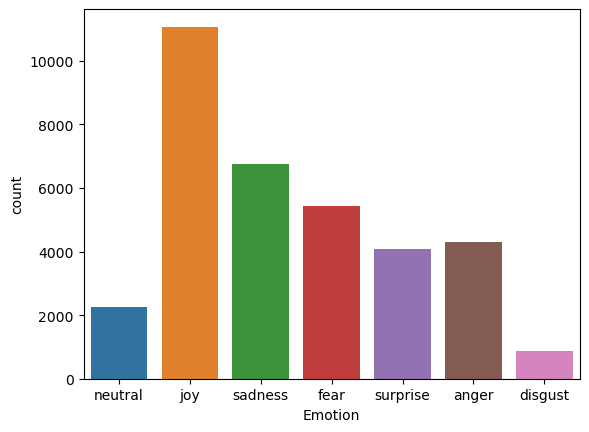

In [79]:
# Plot
sns.countplot(x='Emotion',data=df)

In [64]:
# #Clean Text Column
# df['Clean_Text'] = df['Text'].apply(lambda x: nfx.remove_userhandles(x))
# df['Clean_Text'] = df['Clean_Text'].apply(lambda x: nfx.remove_stopwords(x))

# # Additional manual cleaning
# df['Clean_Text'] = df['Clean_Text'].str.lower()  # Lowercase everything
# df['Clean_Text'] = df['Clean_Text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
# df['Clean_Text'] = df['Clean_Text'].str.replace(r'\d+', '', regex=True)      # Remove numbers
# df['Clean_Text'] = df['Clean_Text'].str.strip()  # Remove leading/trailing spaces


In [80]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [81]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [82]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [83]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34917,surprise,"Didnât think Iâd score well, but I did.","Didnât think Iâd score well, did."
34918,surprise,The animation caught me off guardâin a good ...,animation caught guardâin good way.
34919,surprise,This topic turned out more interesting than I ...,topic turned interesting assumed.
34920,surprise,Wasnât expecting to enjoy this much.,Wasnât expecting enjoy much.


In [86]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

 #split before applying pipelines because it prevents data leakage.

In [87]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [88]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [89]:
# LogisticRegression Pipeline - Now using countVectorizer again
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [90]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\poorv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [91]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [92]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.633592177164222


Classification Report:

              precision    recall  f1-score   support

       anger       0.67      0.54      0.59      1320
     disgust       0.56      0.19      0.29       259
        fear       0.73      0.67      0.70      1642
         joy       0.64      0.77      0.70      3354
     neutral       0.59      0.73      0.65       700
     sadness       0.58      0.58      0.58      1971
    surprise       0.55      0.44      0.49      1185

    accuracy                           0.63     10431
   macro avg       0.62      0.56      0.57     10431
weighted avg       0.63      0.63      0.63     10431


Confusion Matrix:



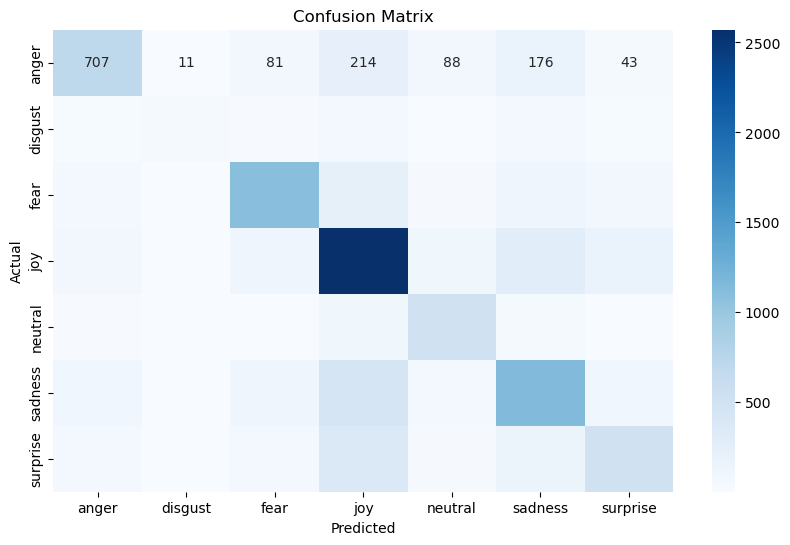

In [93]:
#Make Predictions on Test Data
y_pred = pipe_lr.predict(x_test)

# 1. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred, labels=pipe_lr.classes_)

# Optional: Nice Visualisation using Seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [94]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [95]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [96]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.06706249e-03, 2.27768789e-03, 6.49872465e-03, 9.47253089e-01,
        2.22617823e-05, 1.72677253e-02, 2.56134493e-02]])

In [97]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()